In [51]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [52]:
fd=pd.read_csv('salary.csv')
fd.head()

,YearExperience,Salary
0,1,30000.0
1,2,60000.0
2,3,90000.0
3,4,1200000.0
4,5,1500000.0


In [53]:
fd.isna()

,YearExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,True


In [54]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(fill_value=np.nan,strategy='mean')
x=impute.fit_transform(fd[['Salary']])
x=pd.DataFrame(x)
print(x)

           0
0    30000.0
1    60000.0
2    90000.0
3  1200000.0
4  1500000.0
5   789999.0
6   611666.5


In [55]:

fd.Salary=x[0]


In [60]:
x=fd.iloc[:,:-1].values
y=fd.iloc[:,-1].values

x

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [8]])

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [62]:
lr=LinearRegression()
lr

LinearRegression()

In [63]:
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
lr.score(x,y)

-0.13237878539243253

In [65]:
lr.predict([[4]])

array([816046.25581395])

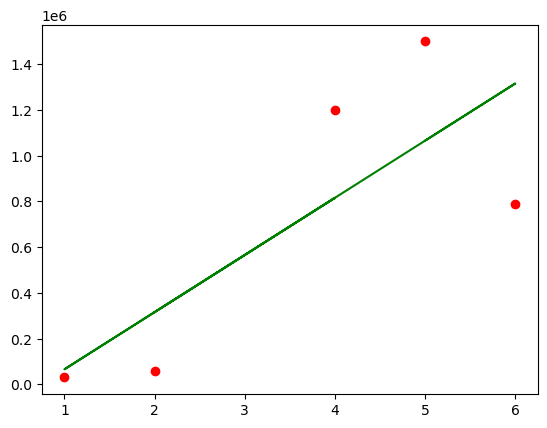

In [71]:
import matplotlib.pyplot as plt 
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='green')
plt.show()

In [75]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [76]:
from sklearn import datasets
wine=datasets.load_wine()


In [77]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [79]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [80]:
x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3,random_state=0)


In [81]:
knn=KNeighborsClassifier(n_neighbors=3)


In [87]:
from sklearn import metrics
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)




[0 1 1 0 1 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 0 2 0 1 1 1 2 1 0 2 0 2 1 0 2]


/home/robot/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [89]:
from sklearn import preprocessing

In [90]:
le=preprocessing.LabelEncoder()

In [92]:
le.fit_transform(y_pred)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1,
       1, 2, 1, 0, 2, 0, 2, 1, 0, 2])

In [94]:
le.inverse_transform(y_pred)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1,
       1, 2, 1, 0, 2, 0, 2, 1, 0, 2])

In [97]:
#decision tree 
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [100]:
dia=datasets.load_diabetes()
dia.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [104]:
dia.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [117]:
x_train,x_test,y_train,y_test=train_test_split(dia.data,dia.target,test_size=0.2,random_state=10)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
metrics.accuracy_score(y_pred,y_test)

0.02247191011235955

In [118]:
metrics.precision_score(y_test,y_pred,average="micro")

0.02247191011235955

In [123]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3,random_state=1)
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)


In [124]:
metrics.precision_score(y_test,y_pred,average="micro")

0.9555555555555556

In [1]:
#kMeans
from sklearn.cluster import KMeans

In [3]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 


In [9]:
fd=pd.read_csv('Mall_Customers.csv')
fd

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
x=fd.drop(columns=['CustomerID','Gender','Age'],axis=1).values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

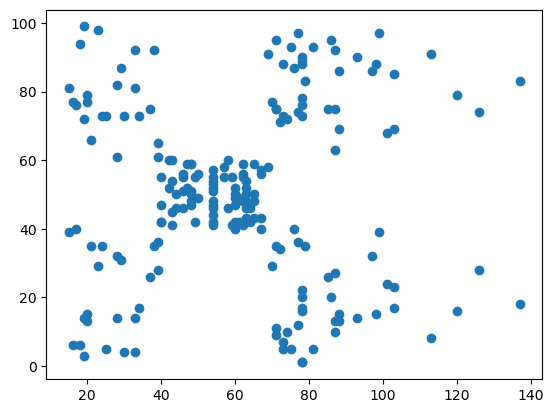

In [13]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [19]:
wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i,random_state=2,n_init=10)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f19db546f70>
Traceback (most recent call last):
  File "/home/robot/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/robot/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/robot/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/robot/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

[269981.28,
 181363.59595959593,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30552.714025467285,
 25022.485004530354,
 21830.041978049438,
 20064.59240151933,
 17636.64997270032,
 16076.144767635467,
 15012.944530827597,
 12996.660758848993]

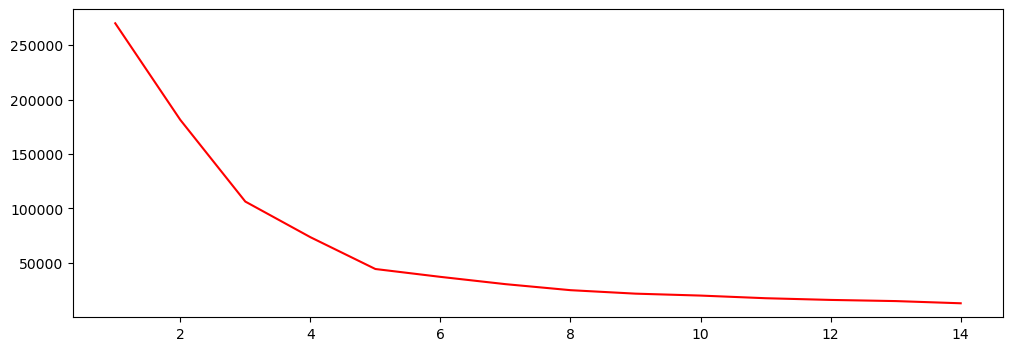

In [28]:
plt.figure(figsize=(12,4))
plt.plot(range(1,15),wcss,color='red')
plt.show()

In [23]:
km=KMeans(n_clusters=5,n_init=10)
km.fit(x)
y=km.predict(x)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f19db546f70>
Traceback (most recent call last):
  File "/home/robot/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/robot/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/robot/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/robot/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


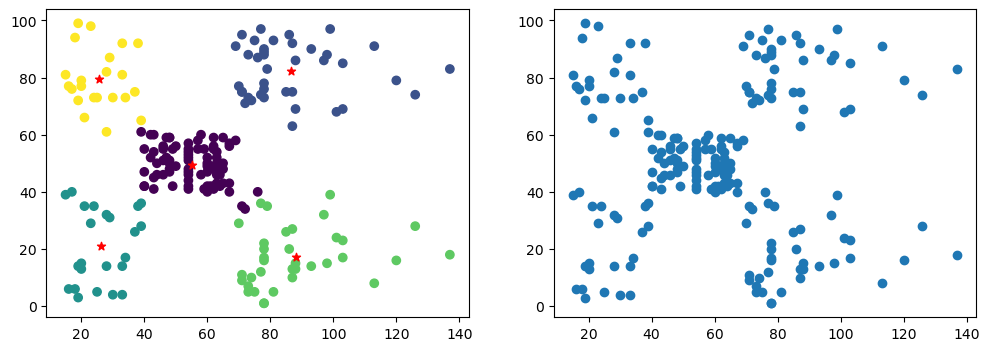

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c=y)

for center in km.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker='*',c='red')


plt.subplot(1,2,2)
plt.scatter(x[:,0],x[:,1])

plt.show()


In [44]:
print(km.labels_)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


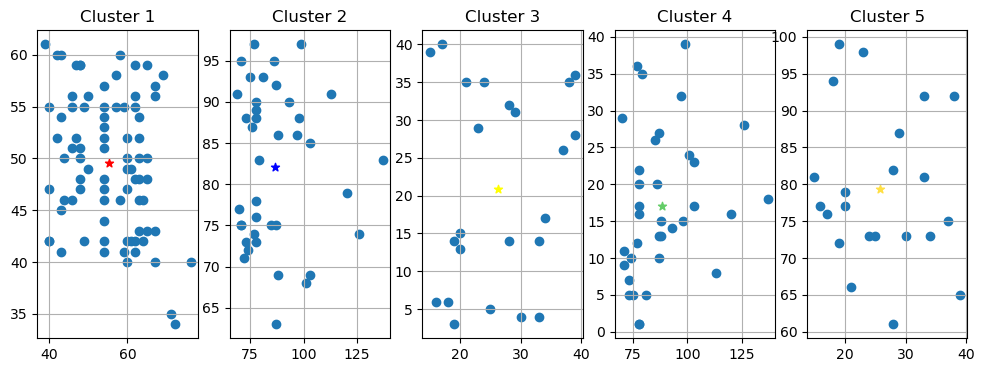

In [47]:

color=['red','blue','yellow','#63cd67','#ffdf43']
plt.figure(figsize=(12,4))
for i,center in enumerate(km.cluster_centers_):
    center=center[:2]
    plt.subplot(1,5,i+1)
    plt.scatter(center[0],center[1],marker='*',c=color[i])
    plt.scatter(x[km.labels_ == i, 0], x[km.labels_ == i, 1])
    plt.title(f'Cluster {i+1}')
    plt.grid(True)
plt.show()

In [48]:
# KNN in iris dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets


In [49]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [50]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3,random_state=10)


In [54]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

/home/robot/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [72]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [57]:
from sklearn import metrics


In [66]:
metrics.accuracy_score(y_pred,y_test)

0.9777777777777777

In [67]:
metrics.precision_score(y_pred,y_test,average='micro')

0.9777777777777777

In [68]:
metrics.recall_score(y_pred,y_test,average='micro')

0.9777777777777777

In [75]:
for x,y in zip(y_pred,y_test):
    if y_pred[x] != y_test[y]:
        print("\n Wrong Prediction \t True:",iris.target_names[y_test[x]],"\tPredicted: ",iris.target_names[y_pred[y]])
    else:
        print("\n True Prediction \t True:",iris.target_names[y_test[x]],"\tPredicted: ",iris.target_names[y_pred[y]])


 True Prediction 	 True: virginica 	Predicted:  virginica

 True Prediction 	 True: setosa 	Predicted:  setosa

 True Prediction 	 True: versicolor 	Predicted:  versicolor

 True Prediction 	 True: virginica 	Predicted:  virginica

 True Prediction 	 True: versicolor 	Predicted:  versicolor

 True Prediction 	 True: virginica 	Predicted:  virginica

 Wrong Prediction 	 True: setosa 	Predicted:  virginica

 True Prediction 	 True: virginica 	Predicted:  virginica

 True Prediction 	 True: versicolor 	Predicted:  versicolor

 True Prediction 	 True: virginica 	Predicted:  virginica

 True Prediction 	 True: virginica 	Predicted:  virginica

 True Prediction 	 True: setosa 	Predicted:  setosa

 True Prediction 	 True: virginica 	Predicted:  virginica

 True Prediction 	 True: versicolor 	Predicted:  versicolor

 True Prediction 	 True: versicolor 	Predicted:  versicolor

 True Prediction 	 True: setosa 	Predicted:  setosa

 True Prediction 	 True: virginica 	Predicted:  virginica

 True 